# Model 구체적 예시 비교

## Vision Transformer

In [1]:
import cv2
from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.models import load_model
import numpy as np
from joblib import load
import tensorflow as tf
from vit_keras import vit, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

# 모델 예측 성능 체크 완료!!!!!! 잘 예측됨 !!!!!!!!
# 우선 먼저, 이미지 예측 되나 확인부터 해보자. 하나의 이미지 가져와서.
vit_model = keras.models.load_model('../vit_model.h5')


c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
class_mapping = {0: 'Bicycle',
 1: 'Bridge',
 2: 'Bus',
 3: 'Car',
 #4: 'Chimney',
 #5: 'Crosswalk',
 6: 'Hydrant',
 #7: 'Motorcycle',
 #8: 'Other',
 #9: 'Palm',
 #10: 'Stair',
 11: 'Traffic Light'}

### 3x3 : Big image Test

1/1 [==============================] - 0s 287ms/step
Predicted class: Hydrant


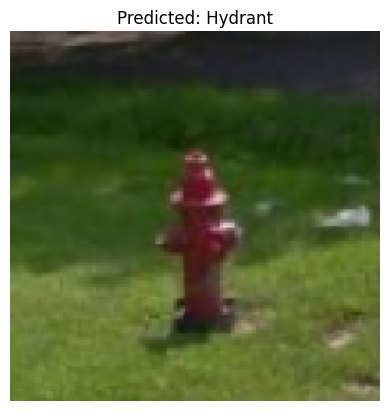

In [35]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
import numpy as np
import matplotlib.pyplot as plt

# 이미지 경로
img_path = '..\Data\Big Image Data\Hydrant\Hydrant (100).png'

# 이미지 불러오기 및 전처리
img = image.load_img(img_path, target_size=(224, 224))  # 이미지를 불러와서 모델의 입력 사이즈에 맞게 조절합니다.
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = imagenet_utils.preprocess_input(img_array, mode='torch')  # 전처리 (예: normalization)

# 모델을 통한 예측 수행
predictions = vit_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# 예측 결과 출력
print("Predicted class:", class_mapping[predicted_class[0]])

# 이미지 시각화
plt.imshow(img)
plt.title(f'Predicted: {class_mapping[predicted_class[0]]}')
plt.axis('off')
plt.show()


### 3x3 : small image

1/1 [==============================] - 0s 278ms/step


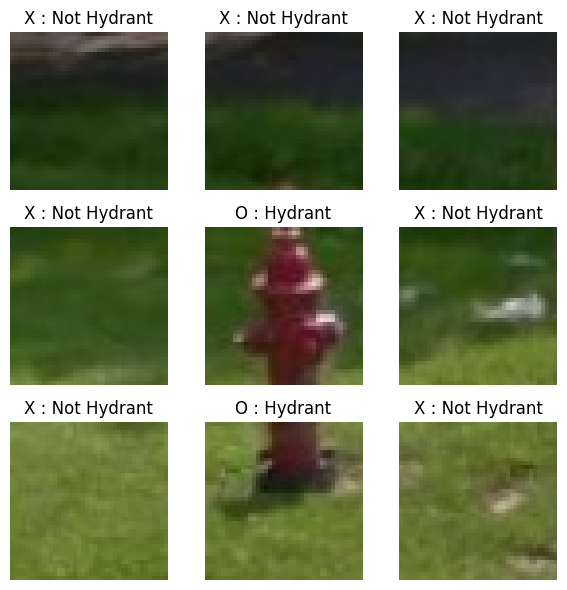

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.patches as patches


def visualize_predictions(image_folder, class_label):
    fig, axs = plt.subplots(3, 3, figsize=(6, 6))

    for i in range(3):
        for j in range(3):
            img_path = os.path.join(image_folder, f'{class_mapping[class_label]}_100_({i}, {j}).jpg')
            
            img = Image.open(img_path)
            new_image = img.resize((224, 224))
            new_image = img_to_array(new_image)
            new_image = new_image / 255.0
            new_image = np.expand_dims(new_image, axis=0)

            predictions = vit_model.predict(new_image)
            predicted_class = np.argmax(predictions, axis=1)[0]

            axs[i, j].imshow(img, zorder=1)
            if predicted_class == class_label:
                title = f"O : {class_mapping[class_label]}"
            else:
                title = f"X : Not {class_mapping[class_label]}"

            axs[i, j].set_title(title)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# 함수 호출 예시
visualize_predictions('..\Data\Small Image Data\Hydrant', 6)


### 4x4 small image

1/1 [==============================] - 1s 735ms/step


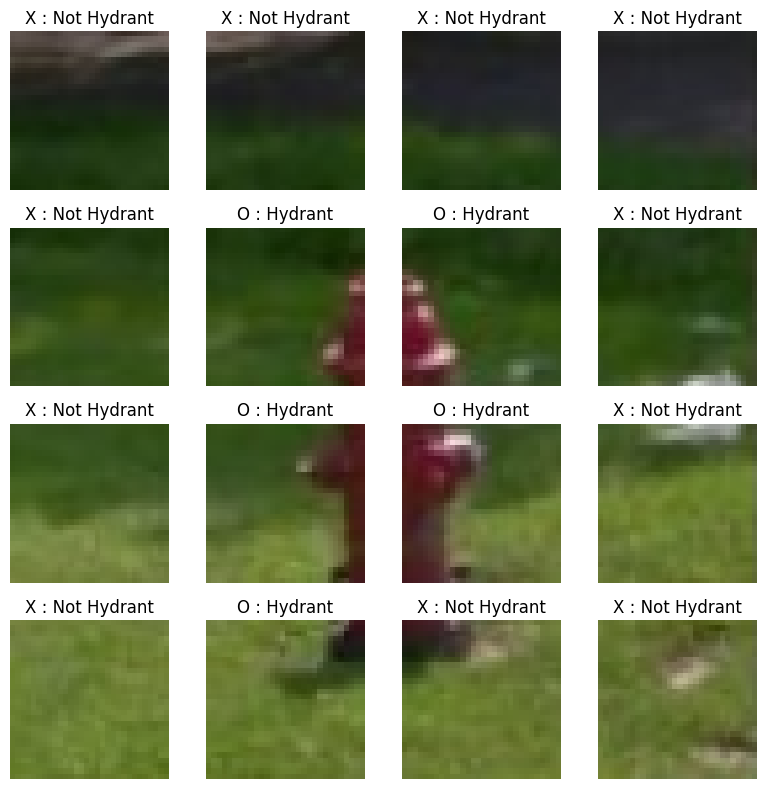

In [7]:
def visualize_grid_predictions(image_path, class_label, grid_size=4):
    # 이미지 불러오기
    original_img = Image.open(image_path)

    # 그리드 크기 설정
    grid_width = original_img.width // grid_size
    grid_height = original_img.height // grid_size

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(8, 8))

    for i in range(grid_size):
        for j in range(grid_size):
            # 그리드 영역으로 이미지 자르기
            left = j * grid_width
            upper = i * grid_height
            right = left + grid_width
            lower = upper + grid_height
            cropped_img = original_img.crop((left, upper, right, lower))
            cropped_img = cropped_img.convert("RGB")

            # 이미지 전처리 및 예측
            new_image = cropped_img.resize((224, 224))
            new_image = img_to_array(new_image)
            new_image = new_image / 255.0
            new_image = np.expand_dims(new_image, axis=0)

            predictions = vit_model.predict(new_image)
            predicted_class = np.argmax(predictions, axis=1)[0]

            # 예측 결과 확인 및 출력
            if predicted_class == class_label:
                title = f"O : {class_mapping[class_label]}"
            else:
                title = f"X : Not {class_mapping[class_label]}"

            axs[i, j].imshow(cropped_img)
            axs[i, j].set_title(title)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# 함수 호출 예시
image_path = '..\Data\Big Image Data\Hydrant\Hydrant (100).png'
class_label = 6  # 'Hydrant'에 해당하는 클래스 레이블
visualize_grid_predictions(image_path, class_label)


## YOLO v5


하나의 이미지를 3x3 그리드로 자르고, 각 그리드에 대해 Bounding Box가 포함되어 있는지 확인하려면, 먼저 이미지의 전체 크기를 알아야 합니다. 이미지의 크기를 알면 각 그리드의 좌표 범위를 계산할 수 있습니다. 그런 다음, 각 Bounding Box의 좌표가 어떤 그리드에 속하는지 확인합니다.

### 3x3 : Big Image

In [14]:
import json
# JSON 파일 경로
json_data_path = r"C:\Users\USER\bomishot\Solving_ReCAPTCHA_v2_Challenge_with_ViT\yolov5\detected_results.json"

# JSON 파일 로드
with open(json_data_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)


In [16]:
json_data

{'Hydrant (100)': [{'label': 'fire hydrant',
   'confidence': '0.87',
   'bounding_box': [47.0, 38.0, 76.0, 99.0]}],
 'Hydrant (101)': [{'label': 'fire hydrant',
   'confidence': '0.78',
   'bounding_box': [51.0, 17.0, 102.0, 119.0]}],
 'Hydrant (102)': [],
 'Hydrant (103)': [{'label': 'fire hydrant',
   'confidence': '0.88',
   'bounding_box': [43.0, 20.0, 87.0, 91.0]}],
 'Hydrant (104)': [{'label': 'fire hydrant',
   'confidence': '0.82',
   'bounding_box': [51.0, 34.0, 92.0, 99.0]}],
 'Hydrant (105)': [{'label': 'person',
   'confidence': '0.73',
   'bounding_box': [33.0, 54.0, 111.0, 120.0]}],
 'Hydrant (106)': [{'label': 'fire hydrant',
   'confidence': '0.83',
   'bounding_box': [47.0, 29.0, 86.0, 119.0]}],
 'Hydrant (107)': [{'label': 'fire hydrant',
   'confidence': '0.46',
   'bounding_box': [23.0, 42.0, 63.0, 116.0]}],
 'Hydrant (108)': [{'label': 'fire hydrant',
   'confidence': '0.53',
   'bounding_box': [52.0, 30.0, 82.0, 91.0]}],
 'Hydrant (109)': [],
 'Hydrant (110)': []

In [9]:
hydrant_100_img_path = r"C:\Users\USER\bomishot\Solving_ReCAPTCHA_v2_Challenge_with_ViT\Data\Big Image Data\Hydrant\Hydrant (100).png"

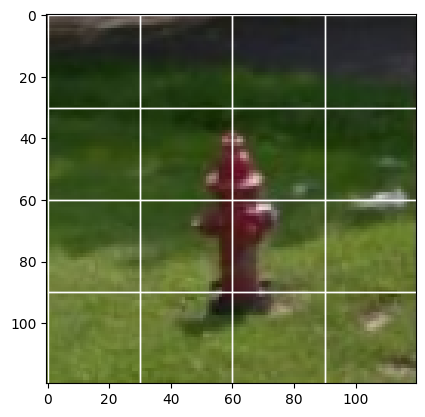

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# 이미지 경로 지정
img_path = r"C:\Users\USER\bomishot\Solving_ReCAPTCHA_v2_Challenge_with_ViT\Data\Big Image Data\Hydrant\Hydrant (100).png"

# 이미지 불러오기
img = plt.imread(img_path)

# 캔버스 생성
fig, ax = plt.subplots()

# 원본 이미지 표시
ax.imshow(img)

# 이미지의 크기 (가로, 세로)
img_width = img.shape[1]  # 이미지의 가로 크기
img_height = img.shape[0]  # 이미지의 세로 크기

# 그리드의 크기 계산
grid_width = img_width // 4
grid_height = img_height // 4

# 각 그리드를 이미지 위에 표시
for i in range(4):
    for j in range(4):
        # 그리드의 경계 좌표 계산
        x = j * grid_width
        y = i * grid_height

        # 그리드 그리기
        rect = patches.Rectangle((x, y), grid_width, grid_height, linewidth=1, edgecolor='white', facecolor='none')
        ax.add_patch(rect)

# 이미지 보여주기
plt.show()


In [29]:
# 이미지의 크기 (가로, 세로)
img_width = 120
img_height = 120

# 그리드의 크기 계산
grid_width = img_width // 3
grid_height = img_height // 3

result_dict = {}

for key, detections in json_data.items():
    detected_grids = [[False, False, False] for _ in range(3)]
    for detection in detections:
        if detection["label"] == "fire hydrant":
            # Bounding Box의 4개의 좌표 계산
            x_min = detection["bounding_box"][0]
            y_min = detection["bounding_box"][1]
            x_max = detection["bounding_box"][2]
            y_max = detection["bounding_box"][3]

            # Bounding Box가 속한 그리드를 찾기
            for i in range(3):
                for j in range(3):
                    # 현재 grid의 최소 최대 x,y 좌표 계산
                    grid_x_min = i * grid_width
                    grid_y_min = j * grid_height
                    grid_x_max = (i + 1) * grid_width
                    grid_y_max = (j + 1) * grid_height

                    # 그리드와 Bounding Box가 겹치는 경우
                    # Bounding Box의 x좌표 범위와 그리드의 x좌표 범위가 겹치고,
                    # Bounding Box의 y좌표 범위와 그리드의 y좌표 범위가 겹칠 때,
                    # 해당 그리드는 Bounding Box에 겹치는 것
                    if (x_min < grid_x_max and x_max > grid_x_min and
                            y_min < grid_y_max and y_max > grid_y_min):
                        detected_grids[j][i] = True

    # 결과 딕셔너리에 key별 detected_grids 저장
    result_dict[key] = detected_grids

# 최종 결과 출력
for key, grids in result_dict.items():
    print(f"For key: {key}")
    for row in grids:
        print(row)
    print()


For key: Hydrant (100)
[False, True, False]
[False, True, False]
[False, True, False]

For key: Hydrant (101)
[False, True, True]
[False, True, True]
[False, True, True]

For key: Hydrant (102)
[False, False, False]
[False, False, False]
[False, False, False]

For key: Hydrant (103)
[False, True, True]
[False, True, True]
[False, True, True]

For key: Hydrant (104)
[False, True, True]
[False, True, True]
[False, True, True]

For key: Hydrant (105)
[False, False, False]
[False, False, False]
[False, False, False]

For key: Hydrant (106)
[False, True, True]
[False, True, True]
[False, True, True]

For key: Hydrant (107)
[False, False, False]
[True, True, False]
[True, True, False]

For key: Hydrant (108)
[False, True, True]
[False, True, True]
[False, True, True]

For key: Hydrant (109)
[False, False, False]
[False, False, False]
[False, False, False]

For key: Hydrant (110)
[False, False, False]
[False, False, False]
[False, False, False]

For key: Hydrant (111)
[False, False, False]
[T

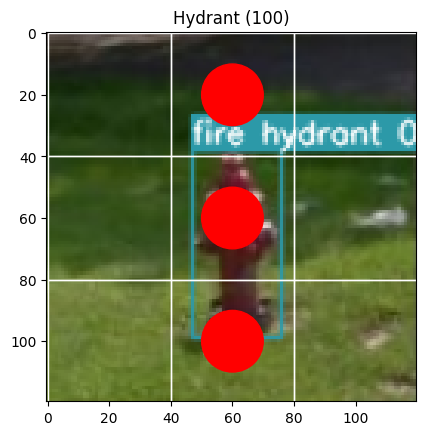

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# key별로 이미지 경로 설정
img_paths = {
    'Hydrant (100)': r"C:\Users\USER\bomishot\Solving_ReCAPTCHA_v2_Challenge_with_ViT\yolov5\runs\detect\exp7\Hydrant (100).png",
    # 다른 key에 대한 이미지 경로도 추가...
}

# 각 key에 대해 이미지 처리
for key, detected_grids in result_dict.items():
    # 해당 key의 이미지 경로 찾기
    try:
        img_path = img_paths[key]
    except KeyError:
        continue
    # 이미지 불러오기
    img = plt.imread(img_path)

    # 캔버스 생성
    fig, ax = plt.subplots()

    # 원본 이미지 표시
    ax.imshow(img)
    # 각 그리드의 탐지 결과를 이미지 위에 표시
    for i in range(3):
        for j in range(3):
            # 그리드의 경계 좌표 계산
            x = j * grid_width
            y = i * grid_height
            # 탐지된 경우, 그리드를 빨간색으로 표시
            if detected_grids[i][j]:
                color = 'red'
                # 빨간색 동그라미 그리기 (여기서 (x + grid_width / 2, y + grid_height / 2)는 그리드의 중심점)
                circle = patches.Circle((x + grid_width / 2, y + grid_height / 2), radius=10, color=color)
                ax.add_patch(circle)
            else:
                color = 'none'

            # 그리드 그리기
            rect = patches.Rectangle((x, y), grid_width, grid_height, linewidth=1, edgecolor='white', facecolor='none')
            ax.add_patch(rect)

    # 이미지 제목 설정
    plt.title(key)

    # 이미지 보여주기
    plt.show()


### 4x4 image

In [32]:
# 이미지의 크기 (가로, 세로)
img_width = 120
img_height = 120

# 그리드의 크기 계산
grid_width = img_width // 4
grid_height = img_height // 4

result_dict = {}

for key, detections in json_data.items():
    detected_grids = [[False, False, False, False] for _ in range(4)]
    for detection in detections:
        if detection["label"] == "fire hydrant":
            # Bounding Box의 4개의 좌표 계산
            x_min = detection["bounding_box"][0]
            y_min = detection["bounding_box"][1]
            x_max = detection["bounding_box"][2]
            y_max = detection["bounding_box"][3]

            # Bounding Box가 속한 그리드를 찾기
            for i in range(4):
                for j in range(4):
                    # 현재 grid의 최소 최대 x,y 좌표 계산
                    grid_x_min = i * grid_width
                    grid_y_min = j * grid_height
                    grid_x_max = (i + 1) * grid_width
                    grid_y_max = (j + 1) * grid_height

                    # 그리드와 Bounding Box가 겹치는 경우
                    # Bounding Box의 x좌표 범위와 그리드의 x좌표 범위가 겹치고,
                    # Bounding Box의 y좌표 범위와 그리드의 y좌표 범위가 겹칠 때,
                    # 해당 그리드는 Bounding Box에 겹치는 것
                    if (x_min < grid_x_max and x_max > grid_x_min and
                            y_min < grid_y_max and y_max > grid_y_min):
                        detected_grids[j][i] = True

    # 결과 딕셔너리에 key별 detected_grids 저장
    result_dict[key] = detected_grids

# 최종 결과 출력
for key, grids in result_dict.items():
    print(f"For key: {key}")
    for row in grids:
        print(row)
    print()


For key: Hydrant (100)
[False, False, False, False]
[False, True, True, False]
[False, True, True, False]
[False, True, True, False]

For key: Hydrant (101)
[False, True, True, True]
[False, True, True, True]
[False, True, True, True]
[False, True, True, True]

For key: Hydrant (102)
[False, False, False, False]
[False, False, False, False]
[False, False, False, False]
[False, False, False, False]

For key: Hydrant (103)
[False, True, True, False]
[False, True, True, False]
[False, True, True, False]
[False, True, True, False]

For key: Hydrant (104)
[False, False, False, False]
[False, True, True, True]
[False, True, True, True]
[False, True, True, True]

For key: Hydrant (105)
[False, False, False, False]
[False, False, False, False]
[False, False, False, False]
[False, False, False, False]

For key: Hydrant (106)
[False, True, True, False]
[False, True, True, False]
[False, True, True, False]
[False, True, True, False]

For key: Hydrant (107)
[False, False, False, False]
[True, True

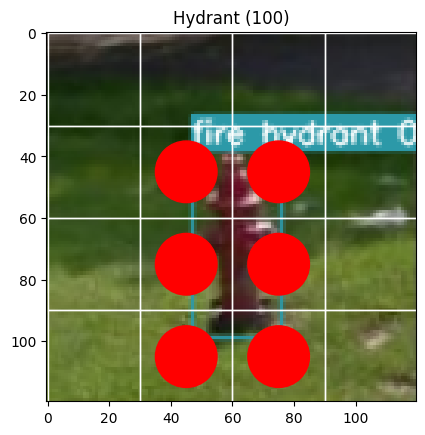

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# key별로 이미지 경로 설정
img_paths = {
    'Hydrant (100)': r"C:\Users\USER\bomishot\Solving_ReCAPTCHA_v2_Challenge_with_ViT\yolov5\runs\detect\exp7\Hydrant (100).png",
    # 다른 key에 대한 이미지 경로도 추가...
}

# 각 key에 대해 이미지 처리
for key, detected_grids in result_dict.items():
    # 해당 key의 이미지 경로 찾기
    try:
        img_path = img_paths[key]
    except KeyError:
        continue
    # 이미지 불러오기
    img = plt.imread(img_path)

    # 캔버스 생성
    fig, ax = plt.subplots()

    # 원본 이미지 표시
    ax.imshow(img)

    # 각 그리드의 탐지 결과를 이미지 위에 표시
    for i in range(4):
        for j in range(4):
            # 그리드의 경계 좌표 계산
            x = j * grid_width
            y = i * grid_height

            # 탐지된 경우, 그리드를 빨간색으로 표시
            if detected_grids[i][j]:
                color = 'red'
                # 빨간색 동그라미 그리기 (여기서 (x + grid_width / 2, y + grid_height / 2)는 그리드의 중심점)
                circle = patches.Circle((x + grid_width / 2, y + grid_height / 2), radius=10, color=color)
                ax.add_patch(circle)
            else:
                color = 'none'

            # 그리드 그리기
            rect = patches.Rectangle((x, y), grid_width, grid_height, linewidth=1, edgecolor='white', facecolor='none')
            ax.add_patch(rect)

    # 이미지 제목 설정
    plt.title(key)

    # 이미지 보여주기
    plt.show()


다른 예시로, car에 대해서도 보이자.